# Multivariate Linear Regression

In [1]:
# This notebook contains multivariate linear regression analysis code used to predict graduate earnings.
# We narrowed down to 4 features after comparing PCA and Decision tree analysis and used them for final regression. 

Multiple Linear Regression simply means that you have more than one feature variable.

The generic formula is:
$Y_i = Bias_0 + Weight_1 Feature_1 + Weight_2 Feature_2 + \ldots + Weight_p Feature_p$

The equation is often written as:
$Y_i = \theta_0 + \theta_1 X_{i1} + \theta_2 X_{i2} + \ldots + \theta_p X_{ip}$

* The formula to used in our regression analysis is as below:
* ### $Y_i$ = $Bias_0$ + $Weight_1$ sat_avg + $Weight_2$ age + $Weight_3$ median_hh_income + $Weight_4$ tuition

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset

In [3]:
# Read the csv file into a pandas DataFrame
data = pd.read_csv('consol_data.csv')
data.head()

,UNITID,INSTNM,CITY,STABBR,ZIP,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,PCT_BORN_US,...,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,AGE_ENTRY,FEMALE,FIRST_GEN,FAMINC
0,100654,Alabama A & M University,Normal,AL,35762,46.840000,47.980000,1.48,3.79,94.739998,...,0.0,0.0,0.0258,0.0000,0.1479,0.0000,20.277134,0.5472427116,0.3887357227,30489.792062
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,69.019997,27.760000,1.10,2.03,96.500000,...,0.0,0.0,0.0376,0.2231,0.1837,0.0188,23.584156,0.6369683532,0.3564593301,50315.256601
2,100706,University of Alabama in Huntsville,Huntsville,AL,35899,76.379997,18.980000,1.42,2.55,95.269997,...,0.0,0.0,0.0288,0.1892,0.2072,0.0117,23.152714,0.4779208832,0.3137931034,55624.221251
3,100751,The University of Alabama,Tuscaloosa,AL,35487-0166,75.349998,21.059999,1.20,2.41,96.080002,...,0.0,0.0,0.0295,0.1065,0.2886,0.0155,21.161128,0.607564495,0.2329344729,89976.373415
4,100830,Auburn University at Montgomery,Montgomery,AL,36117-3596,59.970001,37.209999,0.91,1.62,96.849998,...,0.0,0.0,0.0286,0.2555,0.2471,0.0134,22.438243,0.6838975297,0.3906485671,38489.309241


In [4]:
data.columns

Index(['UNITID', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'PCT_WHITE', 'PCT_BLACK',
       'PCT_ASIAN', 'PCT_HISPANIC', 'PCT_BORN_US', 'MEDIAN_HH_INC',
       'LN_MEDIAN_HH_INC', 'POVERTY_RATE', 'UNEMP_RATE', 'LATITUDE',
       'LONGITUDE', 'ADM_RATE', 'ADM_RATE_ALL', 'SAT_AVG', 'COUNT_NWNE_P10',
       'COUNT_WNE_P10', 'MN_EARN_WNE_P10', 'MN_EARN_WNE_MALE0_P10',
       'MN_EARN_WNE_MALE1_P10', 'TUITIONFEE_IN', 'C150_4_WHITE',
       'C150_4_BLACK', 'C150_4_HISP', 'C150_4_ASIAN', 'PCIP01', 'PCIP03',
       'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13',
       'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24',
       'PCIP25', 'PCIP26', 'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38',
       'PCIP39', 'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45',
       'PCIP46', 'PCIP47', 'PCIP48', 'PCIP49', 'PCIP50', 'PCIP51', 'PCIP52',
       'PCIP54', 'AGE_ENTRY', 'FEMALE', 'FIRST_GEN', 'FAMINC'],
      dtype='object')

In [5]:
print(len(data))
# data.dtypes

1060


In [6]:
# data cleanup
data = data.replace('PrivacySuppressed', np.nan).dropna()
# data['MN_EARN_WNE_P10'] = data['MN_EARN_WNE_P10'].astype(int)
data['MN_EARN_WNE_P10'] = pd.to_numeric(data['MN_EARN_WNE_P10'], errors='coerce')
data['FEMALE'] = data['FEMALE'].astype(float)
len(data)

989

In [7]:
# Assign the data to X and y
# Note: Sklearn requires a N x 1 array of values
# so we use reshape to create this

# reshape(-1, 1) says: create a new array with 1 column and however many number of rows are in the data
# see https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

X = data[['SAT_AVG','AGE_ENTRY','MEDIAN_HH_INC', 'TUITIONFEE_IN',
       #'PCT_WHITE', 'PCT_BLACK', 'PCT_ASIAN', 'PCT_HISPANIC','FEMALE', 'POVERTY_RATE'
       #'C150_4_WHITE', 'C150_4_BLACK', 'C150_4_HISP', 'C150_4_ASIAN','FAMINC','TUITIONFEE_IN',
       #'PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09',
       #'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16',
       #'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27',
       #'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39', 'PCIP40', 'PCIP41',
       #'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45', 'PCIP46', 'PCIP47', 'PCIP48',
       #'PCIP49', 'PCIP50', 'PCIP51', 'PCIP52', 'PCIP54'
         ]]
y = data.MN_EARN_WNE_P10.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (989, 4) (989, 1)


In [8]:
type(y[0][0])

numpy.int64

In [9]:
data[['SAT_AVG','AGE_ENTRY','FEMALE', 'MEDIAN_HH_INC', 'TUITIONFEE_IN','MN_EARN_WNE_P10']].head()

,SAT_AVG,AGE_ENTRY,FEMALE,MEDIAN_HH_INC,TUITIONFEE_IN,MN_EARN_WNE_P10
0,850.0,20.277134,0.547243,49720.22,9366.0,34300
1,1147.0,23.584156,0.636968,55735.22,7766.0,46400
2,1221.0,23.152714,0.477921,58688.62,9128.0,50500
3,1181.0,21.161128,0.607564,57928.41,10170.0,49900
4,990.0,22.438243,0.683898,50723.81,9350.0,37900


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
# Use sklearn's `train_test_split` to split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
print('Training Data Length:')
print(len(X_train))
print('Test Data Length:')
print(len(X_test))

Training Data Length:
741
Test Data Length:
248


In [13]:
# Create the model
model = LinearRegression()

In [14]:
# Fit the model to the trainig data. 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 79741109.29415183
R-squared (R2 ): 0.622613695782247


In [16]:
# list(map(int,predicted))

In [17]:
# Call the `score` method on the model to show the r2 score
model.score(X_test, y_test)

0.622613695782247

In [18]:
model.coef_

array([[5.68369974e+01, 2.16893598e+02, 3.08725730e-01, 1.10249309e-01]])

In [19]:
model.intercept_

array([-38316.04928944])

In [20]:
# save the model to a file. so we can use it later to pass values get predictions
import pickle
with open('lr_model', 'wb') as f:
    pickle.dump(model, f)

In [21]:
with open('lr_model', 'rb') as f:
    lr_mod = pickle.load(f)
    pre_val = lr_mod.predict(np.reshape([1100,21, 70000, 15000],(1,4)))
    print(pre_val[0][0])

52023.95411938492


In [22]:
print(type(pre_val[0][0]))

<class 'numpy.float64'>


# R-squared (R2 ): 0.622613695782247

## Trend of Predicted vs Actual data

In [23]:
pred_df = pd.DataFrame({"Predicted": predicted[:,0], "Actual": list(map(int,y_test[:,0]))})[["Predicted", "Actual"]].head(25)
pred_df.head()

,Predicted,Actual
0,46845.312648,47000
1,53147.204728,56100
2,51484.315207,66200
3,38261.156237,38100
4,50744.208260,68200


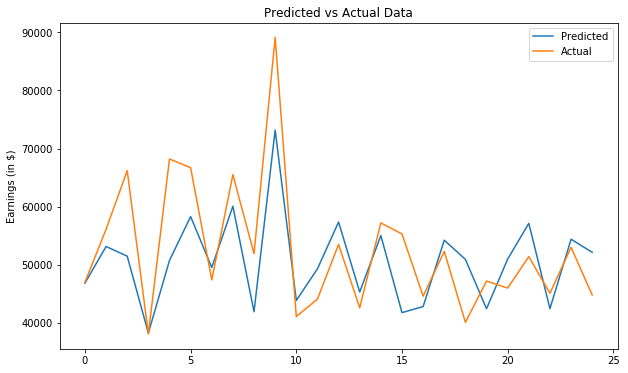

In [24]:
pred_df.plot(figsize=(10,6))
# plt.xlabel('Test Data')
plt.ylabel('Earnings (in $)')
plt.title('Predicted vs Actual Data')

plt.savefig("LR_trend_large.png")
plt.show()

In [25]:
# Plot Residuals
# plt.scatter(predicted[:,0], predicted[:,0] - list(map(float,y_test[:,0])))
# plt.hlines(y=0, xmin=predicted.min(), xmax=predicted.max())
# plt.show()

In [26]:
prediced_inc = model.predict(np.reshape([850.0,20.277134, 49720.22, 9366.0],(1,4)))
prediced_inc

array([[30775.88527783]])

In [27]:
prediced_inc = model.predict(np.reshape([1100,21, 70000, 15000],(1,4)))
prediced_inc

array([[52023.95411938]])

In [28]:
# Code after this is part of learning process and not really used in the project.

## Apply MinMax Scale

In [29]:
# Scaling is just part of learning and it is not required for regression analysis.
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X)
y_minmax = MinMaxScaler().fit(y)
X_transformed = X_minmax.transform(X)
y_tranformed = y_minmax.transform(y)
X_transformed

C:\Users\Jagatha\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.14229765, 0.08089967, 0.23427041, 0.11934123],
       [0.53002611, 0.34428312, 0.33537612, 0.08704866],
       [0.62663185, 0.30992145, 0.38501961, 0.11453771],
       ...,
       [0.32245431, 0.08974607, 0.76004766, 0.15885926],
       [0.39817232, 0.08974607, 0.76004766, 0.15885926],
       [0.34986945, 0.08974607, 0.76004766, 0.15906109]])

In [30]:
# Use sklearn's `train_test_split` to split the data into training and testing
X_strain, X_stest, y_strain, y_stest = train_test_split(X_transformed, y_tranformed, random_state=42)
smodel = LinearRegression()
smodel.fit(X_strain, y_strain)
spredicted = smodel.predict(X_stest)

In [31]:
smodel.score(X_stest, y_stest)

0.6226136957822583

In [32]:
smodel.coef_

array([[0.37891332, 0.02370148, 0.15985004, 0.04754154]])

In [33]:
smodel.intercept_

array([-0.067836])

## Correlation between Median Houshold Income and Mean Income

In [34]:
from scipy.stats import linregress 
import seaborn as sns 
from scipy import stats

No handles with labels found to put in legend.


0.3251


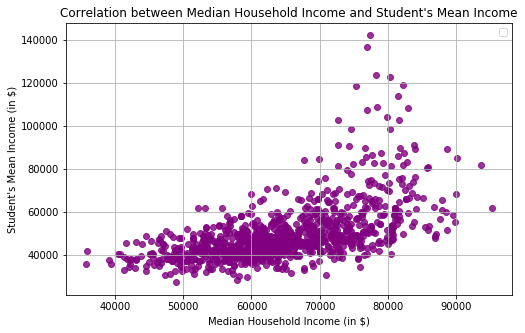

In [35]:
fig = plt.figure(figsize=(8,5)) 
a = list(map(int,data["MEDIAN_HH_INC"].values))
b = list(map(int,data["MN_EARN_WNE_P10"].values))
plt.scatter(a, b, color="purple", marker="o", alpha=0.8) 

# Calculate and add R2 value
slope, intercept, r_value, p_value, std_err = stats.linregress(a,b)
R= round(r_value**2, 4)
print(R)

# Incorporate the other graph properties
plt.title("Correlation between Median Household Income and Student's Mean Income")
plt.xlabel("Median Household Income (in $)")
plt.ylabel("Student's Mean Income (in $)") 

plt.legend(loc='best')
plt.grid(True)
# sns.set_style('whitegrid')
plt.show()

## SAT avg. score vs Earnings

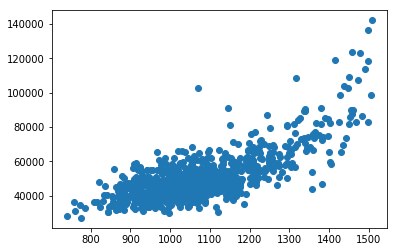

In [36]:
a = data['SAT_AVG']
b = data['MN_EARN_WNE_P10']
plt.scatter(a,b)

## Age at entry vs Earnings

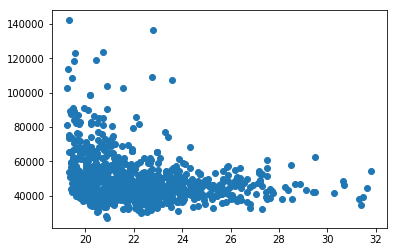

In [37]:
c = data['AGE_ENTRY']
d = data['MN_EARN_WNE_P10']
plt.scatter(c,d)